In [2]:
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf

In [3]:
conf = SparkConf().setMaster("local").setAppName("Darwin")
sc = SparkContext(conf = conf)

In [4]:
df = sc.textFile("resources/1800.csv")

In [5]:
def parseLine(x):
    fields = x.split(',')
    stationID = fields[0]
    entryType = fields[2]
    temperature = float(fields[3]) * 0.1 * (9.0 / 5.0) + 32.0
    return (stationID, entryType, temperature)

In [6]:
parsedf = df.map(parseLine)

In [7]:
minTemps = parsedf.filter(lambda x: "TMAX" in x[1])
stationTemps = minTemps.map(lambda x: (x[0], x[2]))
minTemps = stationTemps.reduceByKey(lambda x, y: min(x,y))
results = minTemps.collect();

for result in results:
    print(result[0] + "\t{:.2f}F".format(result[1]))

ITE00100554	18.50F
EZE00100082	16.52F


In [8]:
import numpy as np

TOTAL = 1000000
dots = sc.parallelize([2.0 * np.random.random(2) - 1.0 for i in range(TOTAL)]).cache()
print("Number of random points:", dots.count())

stats = dots.stats()
print('Mean:', stats.mean())
print('stdev:', stats.stdev())

Number of random points: 1000000
Mean: [0.00114271 0.0001285 ]
stdev: [0.57722293 0.57743587]


There are 10098 dots in the below viz.


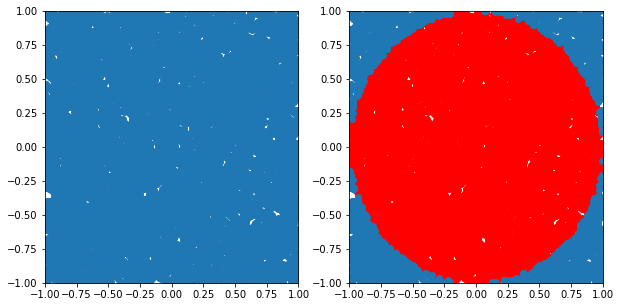

In [18]:
%matplotlib inline
from operator import itemgetter
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 5))

# Plot 1
plt.subplot(1, 2, 1)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

sample = dots.sample(False, 0.01)
X = sample.map(itemgetter(0)).collect()
Y = sample.map(itemgetter(1)).collect()
plt.scatter(X, Y)
print('There are {} dots in the below viz.'.format(sample.count()))
# Plot 2
plt.subplot(1, 2, 2)
plt.xlim((-1.0, 1.0))
plt.ylim((-1.0, 1.0))

inCircle = lambda v: np.linalg.norm(v) <= 1.0
dotsIn = sample.filter(inCircle).cache()
dotsOut = sample.filter(lambda v: not inCircle(v)).cache()

# inside circle
Xin = dotsIn.map(itemgetter(0)).collect()
Yin = dotsIn.map(itemgetter(1)).collect()
plt.scatter(Xin, Yin, color = 'r')

# outside circle
Xout = dotsOut.map(itemgetter(0)).collect()
Yout = dotsOut.map(itemgetter(1)).collect()
plt.scatter(Xout, Yout);